In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import altair as alt

In [102]:
world_cups = pd.read_csv("WorldCups.csv")
world_cup_players = pd.read_csv("WorldCupPlayers.csv")
world_cup_matches = pd.read_csv("WorldCupMatches.csv")

In [103]:
world_cups.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [104]:
world_cup_players.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [105]:
world_cup_matches['Home Team Goals'] = world_cup_matches['Home Team Goals'].fillna(0).astype(int)
world_cup_matches = world_cup_matches.dropna(subset=['Home Team Goals'])
world_cup_matches['Home Team Goals'] = world_cup_matches['Home Team Goals'].astype(int)

world_cup_matches['Away Team Goals'] = world_cup_matches['Away Team Goals'].fillna(0).astype(int)
world_cup_matches = world_cup_matches.dropna(subset=['Away Team Goals'])
world_cup_matches['Away Team Goals'] = world_cup_matches['Away Team Goals'].astype(int)

world_cup_matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [106]:
print(world_cups.describe())

              Year  GoalsScored  QualifiedTeams  MatchesPlayed
count    20.000000    20.000000       20.000000      20.000000
mean   1974.800000   118.950000       21.250000      41.800000
std      25.582889    32.972836        7.268352      17.218717
min    1930.000000    70.000000       13.000000      17.000000
25%    1957.000000    89.000000       16.000000      30.500000
50%    1976.000000   120.500000       16.000000      38.000000
75%    1995.000000   145.250000       26.000000      55.000000
max    2014.000000   171.000000       32.000000      64.000000


<Axes: xlabel='Winner'>

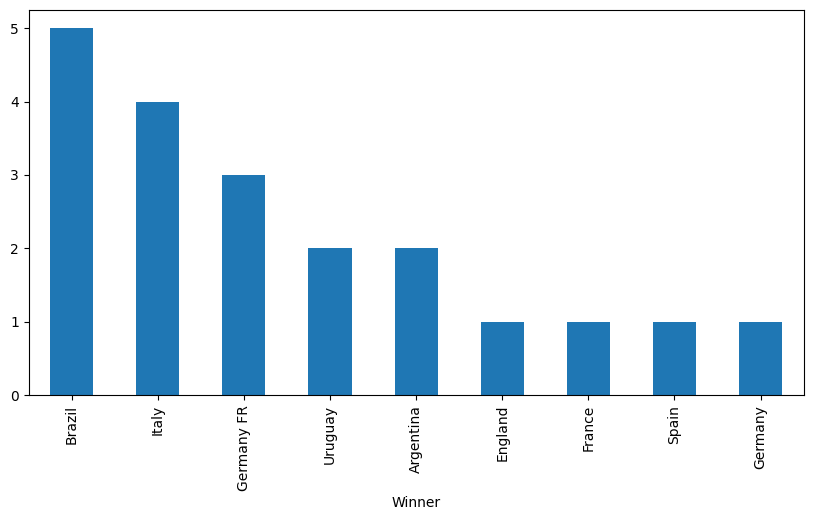

In [107]:
# WHO WON MOST NUMBER OF WORLD CUPS

world_cups.Winner.value_counts().plot(kind='bar', figsize=[10,5])

In [108]:
#TOTAL NUMBER OF GOALS SCORED IN MATCHES (1930-2014)

sum(world_cups['GoalsScored'])

2379

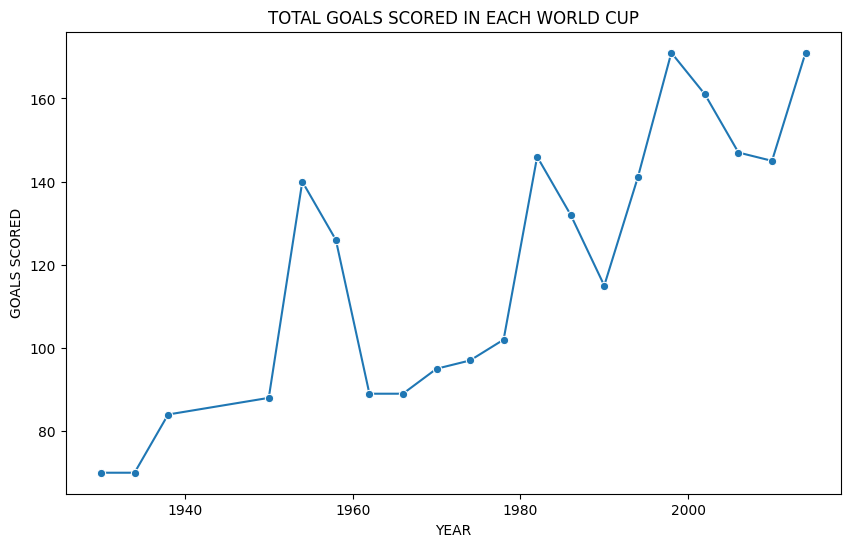

In [109]:
#TOTAL GOALS SCORED BY YEAR
plt.figure(figsize = (10,6))
sns.lineplot(data=world_cups, x='Year', y='GoalsScored', marker='o')
plt.title('TOTAL GOALS SCORED IN EACH WORLD CUP')
plt.xlabel('YEAR')
plt.ylabel('GOALS SCORED')
plt.show()

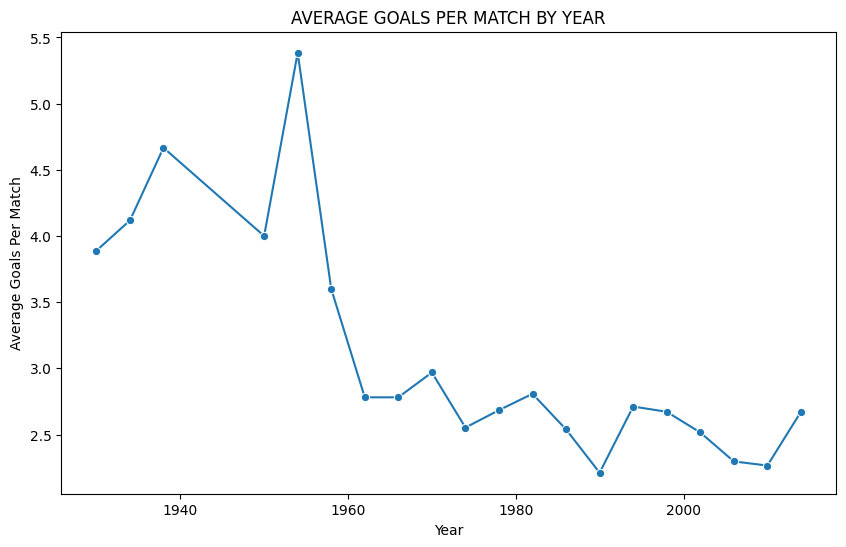

In [110]:
# AVERAGE GOALS PER MATCH BY YEAR
world_cups['AverageGoals'] = world_cups['GoalsScored'] / world_cups['MatchesPlayed']
plt.figure(figsize = (10,6))
sns.lineplot(data=world_cups, x='Year', y='AverageGoals', marker='o')
plt.xlabel("Year")
plt.ylabel("Average Goals Per Match")
plt.title("AVERAGE GOALS PER MATCH BY YEAR")
plt.show()

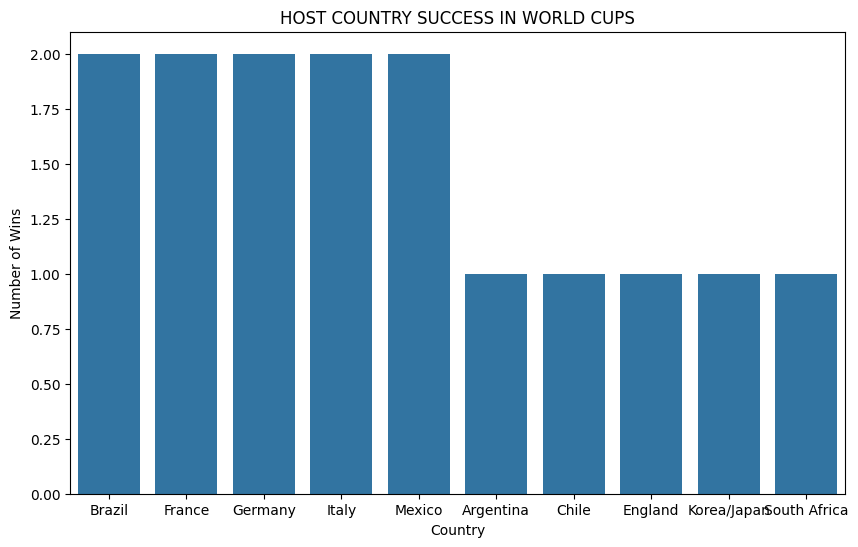

In [111]:
#HOST COUNTRY SUCCESS In WORLD CUPS

host_success = world_cups.groupby('Country')['Winner'].count().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=host_success.index, y=host_success.values)
plt.title('HOST COUNTRY SUCCESS IN WORLD CUPS')
plt.xlabel('Country')
plt.ylabel('Number of Wins')
plt.show()

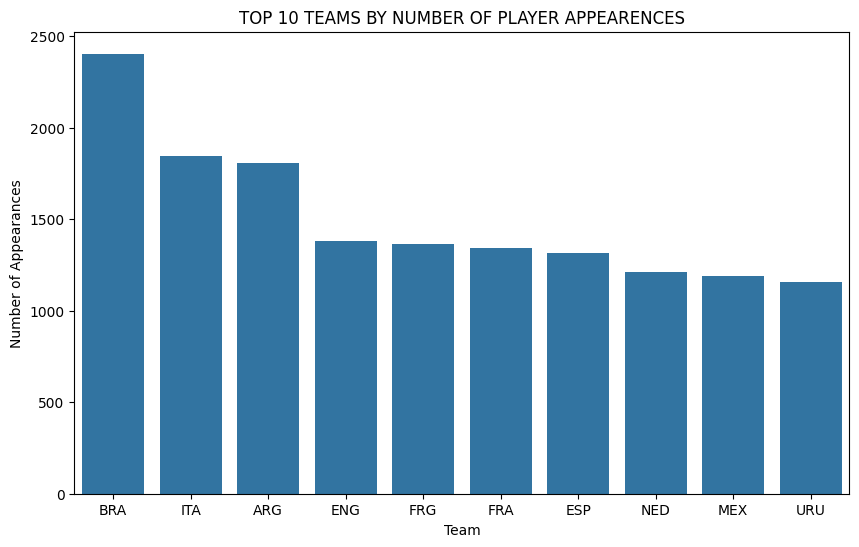

In [112]:
#TOP 10 TEAMS BY NUMBER OF PLAYER APPEARENCES

top_teams = world_cup_players.groupby('Team Initials').size().sort_values(ascending = False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_teams.index, y=top_teams.values)
plt.xlabel('Team')
plt.ylabel('Number of Appearances')
plt.title('TOP 10 TEAMS BY NUMBER OF PLAYER APPEARENCES')
plt.show()

Country
France         7.338542
Brazil         6.671875
Italy          6.329186
Mexico         5.507212
Switzerland    5.384615
Germany        4.849507
Uruguay        3.888889
Sweden         3.600000
Spain          2.807692
Chile          2.781250
Name: AverageGoals, dtype: float64


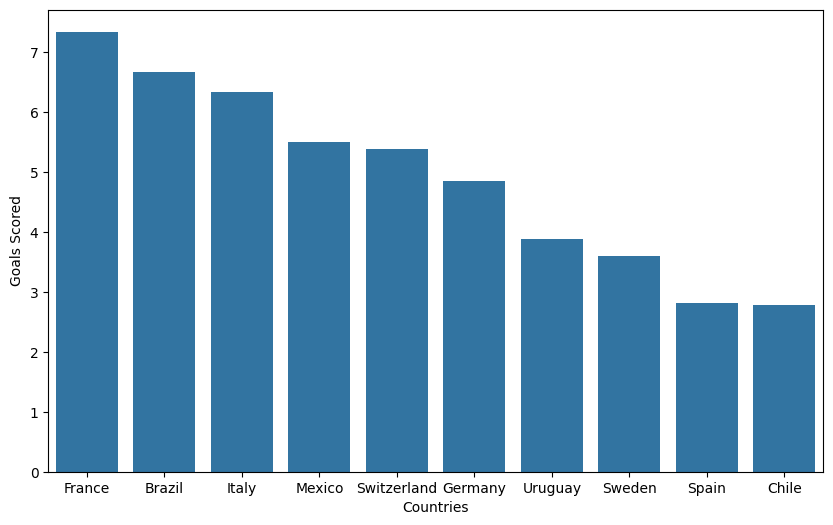

In [113]:
#TOP 10 COUNTRIES BY GOAL SCORED IN WORLD CUP
top_countries = world_cups.groupby('Country')['AverageGoals'].sum().sort_values(ascending=False).head(10)
print(top_countries)

plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.xlabel('Countries')
plt.ylabel('Goals Scored')
plt.show()

Outcome
DRAW        3910
Home Win     488
Away Win     174
Name: count, dtype: int64


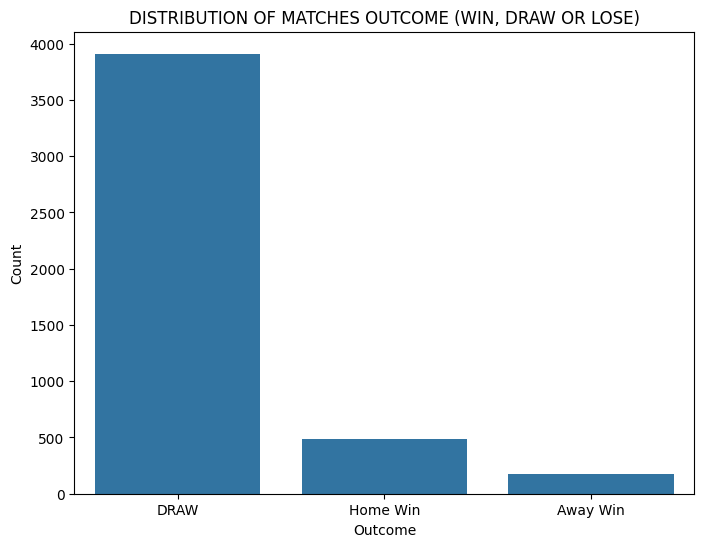

In [114]:
# DISTRIBUTION OF MATCHES OUTCOME (WIN, DRAW OR LOSE)

world_cup_matches['Outcome'] = world_cup_matches.apply(lambda row: 'Home Win' if row['Home Team Goals'] > row['Away Team Goals'] 
                                                       else ('Away Win' if row['Home Team Goals'] < row['Away Team Goals'] else 'DRAW'), axis =1)

Outcome_counts = world_cup_matches['Outcome'].value_counts()
print(Outcome_counts)

plt.figure(figsize=(8,6))
sns.barplot(x=Outcome_counts.index, y=Outcome_counts.values)
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('DISTRIBUTION OF MATCHES OUTCOME (WIN, DRAW OR LOSE)')
plt.show()

In [116]:
#REFEREE ANALYSIS
refree_counts = world_cup_matches['Referee'].value_counts()
top_referees = refree_counts.head()
print("Top Referee with most matches")
print(top_referees)

Top Referee with most matches
Referee
Ravshan IRMATOV (UZB)     10
RODRIGUEZ Marco (MEX)      8
LARRIONDA Jorge (URU)      8
ARCHUNDIA Benito (MEX)     8
QUINIOU Joel (FRA)         8
Name: count, dtype: int64
